# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

# Solución 

### a)

In [49]:
import sympy as sym
from sympy import Symbol 
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
init_printing(use_latex='mathjax')

In [50]:
x = Symbol('x')
y = Function('y')
y_ = cos(x)
Eq(y(x),y_)

y(x) = cos(x)

In [51]:
z = Function('z')
z_ = sin(x)
Eq(z(x),z_)

z(x) = sin(x)

In [52]:
w = Function('w')
w_ = 1/(sin(x)+cos(2*x))
Eq(w(x),w_)

               1        
w(x) = ─────────────────
       sin(x) + cos(2⋅x)

### b)

In [53]:
g = Function('g')
g_ = y_*z_
Eq(g(x),g_)

g(x) = sin(x)⋅cos(x)

In [54]:
Eq(Derivative(g(x),x),Derivative(g_,x).doit())

d               2         2   
──(g(x)) = - sin (x) + cos (x)
dx                            

### c)

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-99-d7a4b176689d>:2: RuntimeWarning: divide by zero encountered in true_divide
  C = 1/(np.sin(X)*np.cos(2*X))


Text(0.5, 1.0, 'Gráfica')

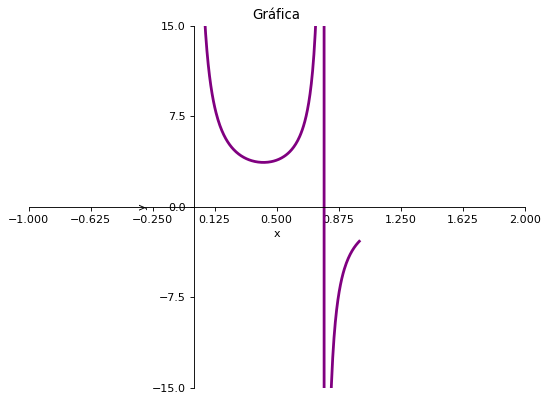

In [99]:
X = np.linspace(0, 1, 256, endpoint=True) 
C = 1/(np.sin(X)*np.cos(2*X))
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-1, 2)

plt.xticks(np.linspace(-1, 2, 9, endpoint=True))

plt.ylim(-15.0, 15.0)

plt.yticks(np.linspace(-15, 15, 5, endpoint=True))
ax = plt.gca() 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.title("Gráfica")

### d)

In [74]:
integrate(g_, x)


   2   
sin (x)
───────
   2   

In [75]:
integrate(g_, (x,0,1))

   2   
sin (1)
───────
   2   

### e)

In [64]:
limit(y_,x,0)

1

In [65]:
limit(z_,x,0)

0

In [66]:
limit(g_,x,0)

0

In [67]:
limit(w_,x,0)

1

### f) 

In [87]:
y_.series(x,0) 

     2    4        
    x    x     ⎛ 6⎞
1 - ── + ── + O⎝x ⎠
    2    24        

In [85]:
#De orden 3
y_.series(x,0,3) 

     2        
    x     ⎛ 3⎞
1 - ── + O⎝x ⎠
    2         

In [88]:
z_.series(x,0) 

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [86]:
#De orden 3
z_.series(x,0,3) 

     ⎛ 3⎞
x + O⎝x ⎠

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [101]:
#Redefinimos las funciones sustituyendo los valores de a, b, c
y = Symbol('y')
z = Symbol('z')
t = Symbol('t')
dx_ = -y-z
Eq(Derivative(x,t),dx_)

d             
──(x) = -y - z
dt            

In [102]:
dy_ = -x+0.3*y
Eq(Derivative(y,t),dy_)

d                 
──(y) = -x + 0.3⋅y
dt                

In [103]:
dz_ = 0.2+z*(x-6.5)
Eq(Derivative(z,t),dz_)

d                        
──(z) = z⋅(x - 6.5) + 0.2
dt                       

In [128]:
def dx(y,z):
    return -y-z
def dy(x,y):
    return -x + 0.3*y
def dz(x,z):
    return z*(x-6.5)+0.2

In [124]:
def RK2(y, t, dt, derivadas):
    """
    y es el valor inicial de y
    t es el valor inicial de t 
    dt son los pasos en t
    derivadas es la derivada de la función y(t)
    
    """
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [148]:
rk1 = RK2(0, 0, 100, dx)
rk1

-5000.0

In [130]:
rk2 = RK2(0, 0, 100, dy)
rk2

1500.0

In [154]:
rk3 = RK2(0, 0, 10, dz)
rk3

-223.0

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

Text(0.5, 1.0, 'Gráfica')

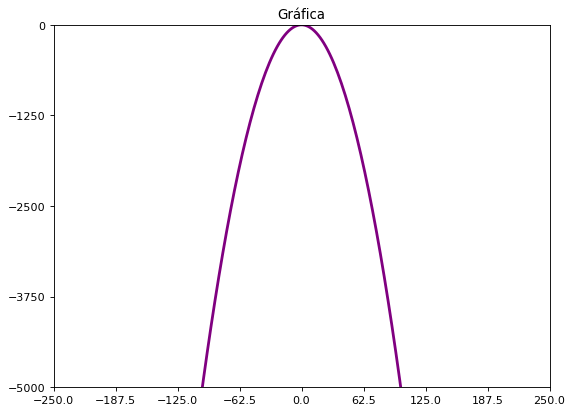

In [153]:
X = np.linspace(-250,250, 256, endpoint=True) 
C = RK2(0, 0, X, dx)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-250,250)

plt.xticks(np.linspace(-250,250, 9, endpoint=True))

plt.ylim(-5000,0)

plt.yticks(np.linspace(-5000,0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

Text(0.5, 1.0, 'Gráfica')

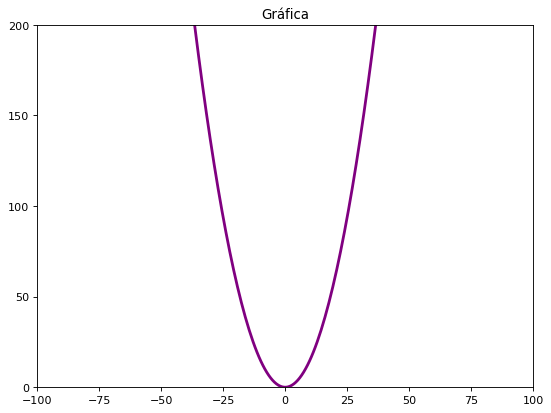

In [141]:
X = np.linspace(-100.0, 100.0, 256, endpoint=True) 
C = RK2(0, 0, X, dy)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-100, 100)

plt.xticks(np.linspace(-100, 100, 9, endpoint=True))

plt.ylim(0.0, 200.0)

plt.yticks(np.linspace(0.0, 200.0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

Text(0.5, 1.0, 'Gráfica')

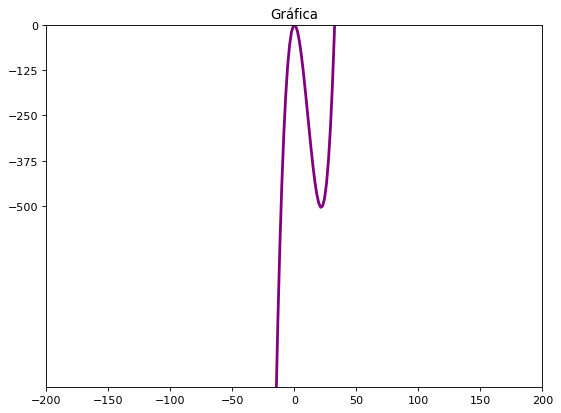

In [162]:
X = np.linspace(-200,200, 256, endpoint=True) 
C = RK2(0, 0, X, dz)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-200,200)

plt.xticks(np.linspace(-200,200, 9, endpoint=True))

plt.ylim(-1000,0)

plt.yticks(np.linspace(-500,0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

Text(0.5, 1.0, 'Gráfica')

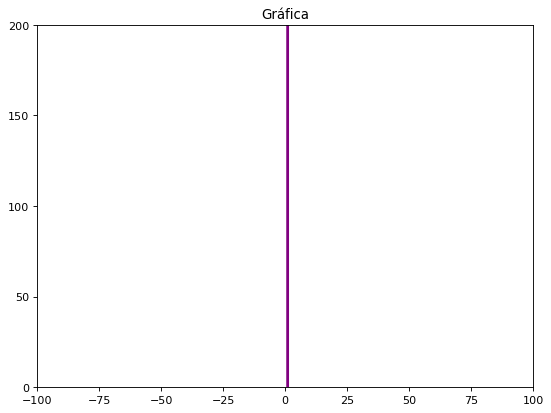

In [143]:
X = np.linspace(-100, 100.0, 256, endpoint=True) 
C = RK2(0, X, 1000, dx)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-100, 100)

plt.xticks(np.linspace(-100, 100, 9, endpoint=True))

plt.ylim(0.0, 200.0)

plt.yticks(np.linspace(0.0, 200.0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

Text(0.5, 1.0, 'Gráfica')

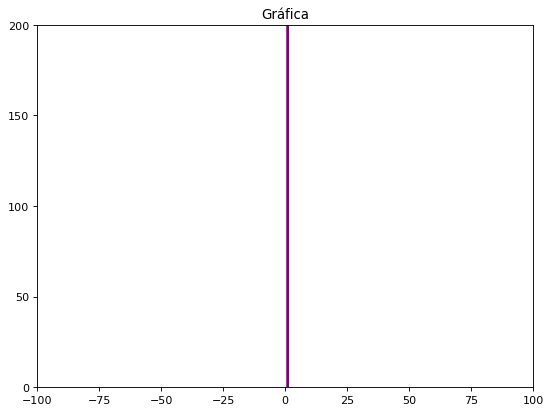

In [144]:
X = np.linspace(-100, 100.0, 256, endpoint=True) 
C = RK2(0, X, 1000, dy)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-100, 100)

plt.xticks(np.linspace(-100, 100, 9, endpoint=True))

plt.ylim(0.0, 200.0)

plt.yticks(np.linspace(0.0, 200.0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

Text(0.5, 1.0, 'Gráfica')

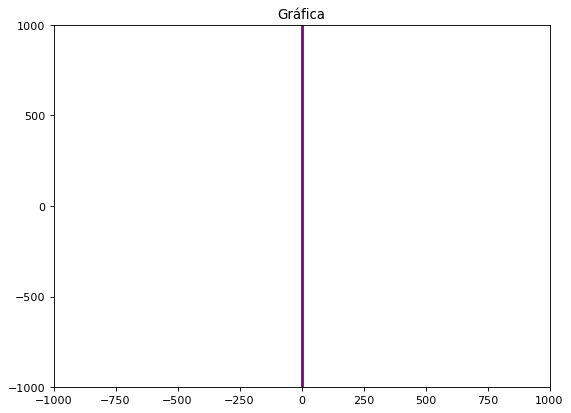

In [163]:
X = np.linspace(-1000, 1000.0, 256, endpoint=True) 
C = RK2(0, X, 1000, dz)
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, C, color="purple", linewidth=2.5, linestyle="-")

plt.xlim(-1000, 1000.0)

plt.xticks(np.linspace(-1000, 1000.0, 9, endpoint=True))

plt.ylim(0.0, 1000)

plt.yticks(np.linspace(-1000, 1000.0, 5, endpoint=True))
ax = plt.gca() 

plt.title("Gráfica")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

ValueError: operands could not be broadcast together with shapes (256,) (200,200) 

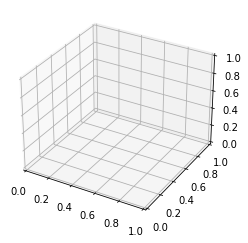

In [122]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
b0 = np.arange(-10, 10, 0.1)
b1 = np.arange(-10, 10, 0.1)
B0, B1 = np.meshgrid(b0, b1) 
Z = RK2(B0, B1, X, dz) #Debería ser la función del atractor de Rössler
ax.plot_surface(B0, B1, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)

## Notas

Se intentó este último ejercicio profe, pero no se supo cómo hacerlo bien. Una disculpa :( 